# 1. Tema a tratar

Los modelos de predicción de fallos en máquinas son herramientas fundamentales en la industria y en diversas aplicaciones donde el funcionamiento ininterrumpido de equipos y maquinaria es crítico. Estos modelos desempeñan un papel crucial al proporcionar información anticipada sobre posibles problemas y averías, lo que permite a las organizaciones tomar medidas preventivas y planificar el mantenimiento de manera más eficiente. A continuación, se describen algunas de las razones clave por las cuales los modelos de predicción de fallos son importantes:

1. **Reducción de costos y mejora de la eficiencia:** La detección temprana de fallos permite a las empresas programar el mantenimiento en momentos oportunos y evitar detenciones no planificadas. Esto disminuye los costos asociados con reparaciones mayores y el tiempo de inactividad imprevisto.

2. **Optimización de inventario:** Los modelos de predicción de fallos pueden ayudar a las empresas a gestionar de manera más precisa su inventario de repuestos y componentes. Esto evita el exceso de inventario innecesario y la falta de piezas críticas en momentos clave.

3. **Prolongación de la vida útil de los activos:** Al identificar problemas potenciales antes de que se conviertan en fallos graves, las empresas pueden tomar medidas para extender la vida útil de sus equipos y maquinaria.

4. **Seguridad y cumplimiento:** En entornos industriales y de manufactura, las averías inesperadas pueden presentar riesgos para la seguridad de los trabajadores y el cumplimiento de regulaciones. La predicción de fallos ayuda a prevenir situaciones peligrosas y asegura que las operaciones se adhieran a las normativas pertinentes.

5. **Recopilación y análisis de datos:** Los modelos de predicción de fallos requieren datos para entrenarse y funcionar. Esto fomenta una cultura de recopilación y análisis de datos en las organizaciones, lo que a su vez puede llevar a mejoras en la toma de decisiones y en la optimización de procesos.

En resumen, los modelos de predicción de fallos en máquinas son esenciales para prevenir problemas, optimizar operaciones, reducir costos y mejorar la eficiencia en una variedad de industrias. Estos modelos permiten una gestión más inteligente de activos y recursos, lo que a su vez contribuye a la sostenibilidad y éxito a largo plazo de las organizaciones.

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Carga de datos

In [105]:
original = pd.read_csv("..\data\machine failure.csv",sep=",", on_bad_lines='skip')
train = pd.read_csv("..\data\\train.csv",sep=",", on_bad_lines='skip')
test = pd.read_csv("..\data\\test.csv",sep=",", on_bad_lines='skip')

### Mostrar mediante un head() los principales datasets con los que se va a trabajar:

In [106]:
original.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [107]:
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [108]:
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


### Obtener información general sobre los datos:

In [109]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [110]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [111]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


### Describe

In [112]:
original.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [113]:
train.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
test.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
count,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.000000,90954.00000,90954.000000
mean,181905.500000,299.859493,309.939375,1520.528179,40.335191,104.293962,0.001473,0.005343,0.002353,0.00387,0.002309
std,26256.302529,1.857562,1.385296,139.970419,8.504683,63.871092,0.038355,0.072903,0.048449,0.06209,0.047995
min,136429.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,159167.250000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,181905.500000,300.000000,310.000000,1493.000000,40.500000,106.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,204643.750000,301.200000,310.900000,1579.000000,46.200000,158.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,227382.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.00000,1.000000


### Genero los df que voy a utilizar

In [115]:
# Concatenamos train y original uno debajo del otro
df_train = pd.concat([train,original],axis = 0) 
df_train

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,UDI
0,0.0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,NaN
1,1.0,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,NaN
2,2.0,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,NaN
3,3.0,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,NaN
4,4.0,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9996.0
9996,NaN,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9997.0
9997,NaN,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9998.0
9998,NaN,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9999.0


In [116]:
#Para el df del test no necesito modificaciones
df_test = test.copy() 
df_test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [117]:
#Para el target genero un df a parte
df_target = df_train.pop('Machine failure')

In [119]:
df_target

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 146429, dtype: int64

,Number,Percent
Machine failure,,
0,143942,0.983016
1,2487,0.016984


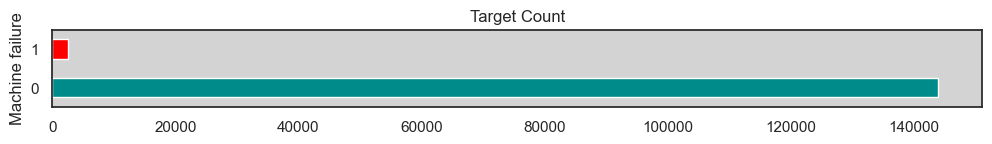

In [120]:
df_target.value_counts().plot(kind='barh', figsize=(12,1), title='Target Count', color=['darkcyan','red'])
plt.gca().set_facecolor('lightgray')

pd.DataFrame(data= {'Number': df_target.value_counts(), 'Percent': df_target.value_counts(normalize=True)})

### Filas en común 

In [121]:
common_rows = df_test.merge(df_train, how='inner').reset_index(drop = True) 
common_rows
# Tenemos 2611 filas en común entre los df de train y test

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,UDI


In [122]:
#Creamos una nueva columna en TEST
df_test['Machine failure'] = np.nan

### Comprensión de la data:

Características:

- ID (Identificador Único de Dispositivo): código de identificación único para cada dispositivo. Los códigos van desde 1 hasta 10,000.
- Product ID: código de identificación para cada producto. Este ID es una combinación de letras y números.
- Type es la clasificación del producto o dispositivo en tres categorías: Bajo, Medio y Alto. Las proporciones de estos tipos en el conjunto de datos son las siguientes: Bajo 50%, Medio 30% y Alto 20%.
- Air temperature [K]: temperatura del aire, medida en unidades Kelvin.
- Process temperature [K]: temperatura durante el proceso de producción, medida en unidades Kelvin.
- Rotational speed [rpm]: número de revoluciones por minuto. Se calcula en base a una potencia de 2860 W y está sujeto a ruido distribuido de manera normal.
- Torque [Nm]: fuerza que hace que un objeto rote, expresada en Newton-metros (Nm). Los valores de torque están distribuidos normalmente alrededor de 40 Nm y no incluyen valores negativos.
- Tool wear [min]: tiempo que tardan las herramientas de producción en erosionarse o dañarse debido al desgaste regular causado por operaciones de corte.

Las características que indican la causa de la falla son las siguientes:

  - TWF (Tool Wear Failure/Falla por Desgaste de Herramienta): falla en la herramienta industrial, lo que lleva a la necesidad de cambiar el equipo y a productos defectuosos.
  - HDF (Heat Dissipation Failure/Falla de Disipación de Calor): falla en la disipación de calor durante el proceso de producción.
  - PWF (Power Failure/Falla de Energía): la energía suministrada no fue adecuada para el proceso de producción, lo que resulta en una falla.
  - OSF (Overstain Failure/Falla por Sobrecarga): falla debido a sobrecargas en el producto, que pueden ocurrir como resultado de una carga y tensión altas durante la producción.
  - RNF (Random Failure/Falla Aleatoria): error aleatorio provoca la falla.

# 3. Definición del problema de Machine Learning

Partimos de un modelos de aprendizaje supervisado ya que contamos con el target en el dataset del train.
Optaremos por un modelo de clasificación debido a los distintos tipos de errores, de esta manera asignaremos una etiqueta o categoría a un conjunto de datos de entrada (nuestro test). 

El modelo aprende a predecir la categoría a la que pertenecen nuevos datos basándose en ejemplos previamente etiquetados en el conjunto de entrenamiento.

# 4. EDA (Exploratory Data Analysis)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Valores nulos

In [124]:
Valores_nulos_train = df_train.isnull().sum()
Valores_nulos_test  = df_test.isnull().sum()

print(':' * 25)
print(f'Valores nulos df_train:\n{Valores_nulos_train [Valores_nulos_train > 0]}') # Imprimimos cuando tiene más de 0 missing values
print(':' * 25)
print(f'Valores nulos df_test:\n{Valores_nulos_test[Valores_nulos_test > 0]}')
print(':' * 25)

:::::::::::::::::::::::::
Valores nulos df_train:
id      10000
UDI    136429
dtype: int64
:::::::::::::::::::::::::
Valores nulos df_test:
Machine failure    90954
dtype: int64
:::::::::::::::::::::::::


Diagrama correlación

In [125]:
df_train.corr(numeric_only=True)

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,UDI
id,1.000000,-0.005338,-0.002396,0.004419,-0.001968,-0.001790,-0.000475,-0.000680,0.003275,0.002114,0.000175,NaN
Air temperature [K],-0.005338,1.000000,0.857645,0.017702,-0.007564,0.017026,0.004853,0.104220,0.007832,0.007573,0.005641,0.117428
Process temperature [K],-0.002396,0.857645,1.000000,0.012359,-0.007073,0.012988,0.004956,0.043093,0.003222,0.005473,0.005573,0.324428
Rotational speed [rpm],0.004419,0.017702,0.012359,1.000000,-0.788496,0.004104,-0.002884,-0.085981,0.065107,-0.066037,-0.004226,-0.006615
Torque [Nm],-0.001968,-0.007564,-0.007073,-0.788496,1.000000,-0.003289,0.009153,0.104958,0.053833,0.116844,0.008584,0.003207
Tool wear [min],-0.001790,0.017026,0.012988,0.004104,-0.003289,1.000000,0.053629,0.010658,0.005800,0.072668,-0.001257,-0.010702
TWF,-0.000475,0.004853,0.004956,-0.002884,0.009153,0.053629,1.000000,0.007767,0.034194,0.036778,0.004912,0.009154
HDF,-0.000680,0.104220,0.043093,-0.085981,0.104958,0.010658,0.007767,1.000000,0.042090,0.064555,0.000332,-0.022215
PWF,0.003275,0.007832,0.003222,0.065107,0.053833,0.005800,0.034194,0.042090,1.000000,0.095089,0.000155,-0.023557
OSF,0.002114,0.007573,0.005473,-0.066037,0.116844,0.072668,0.036778,0.064555,0.095089,1.000000,-0.000933,-0.000990


In [126]:
df_test.corr(numeric_only=True)

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
id,1.000000,-0.005019,-0.005839,-0.000028,0.000465,-0.004766,0.000360,-0.000409,-0.001600,0.002912,0.002829,NaN
Air temperature [K],-0.005019,1.000000,0.855972,0.012901,-0.004892,0.018447,0.008893,0.103498,0.003869,0.012608,0.001752,NaN
Process temperature [K],-0.005839,0.855972,1.000000,0.008324,-0.006220,0.014616,0.009710,0.043706,-0.002658,0.012992,0.006868,NaN
Rotational speed [rpm],-0.000028,0.012901,0.008324,1.000000,-0.777272,0.008849,-0.009013,-0.087204,0.050574,-0.061990,-0.001525,NaN
Torque [Nm],0.000465,-0.004892,-0.006220,-0.777272,1.000000,-0.004352,0.018059,0.103822,0.049382,0.109182,0.002807,NaN
Tool wear [min],-0.004766,0.018447,0.014616,0.008849,-0.004352,1.000000,0.043164,0.002014,0.002967,0.066720,-0.002936,NaN
TWF,0.000360,0.008893,0.009710,-0.009013,0.018059,0.043164,1.000000,0.008981,0.033634,0.057624,0.004125,NaN
HDF,-0.000409,0.103498,0.043706,-0.087204,0.103822,0.002014,0.008981,1.000000,0.027568,0.053726,0.002759,NaN
PWF,-0.001600,0.003869,-0.002658,0.050574,0.049382,0.002967,0.033634,0.027568,1.000000,0.095655,0.002392,NaN
OSF,0.002912,0.012608,0.012992,-0.061990,0.109182,0.066720,0.057624,0.053726,0.095655,1.000000,-0.002998,NaN


Forma de la data:

In [127]:
print('Shape of the training data: ', df_train.shape)
print('Shape of the testing data: ', df_test.shape)

Shape of the training data:  (146429, 14)
Shape of the testing data:  (90954, 14)


Planteamos el heatmap para ver las relaciones existentes entre las distintas features

<Axes: >

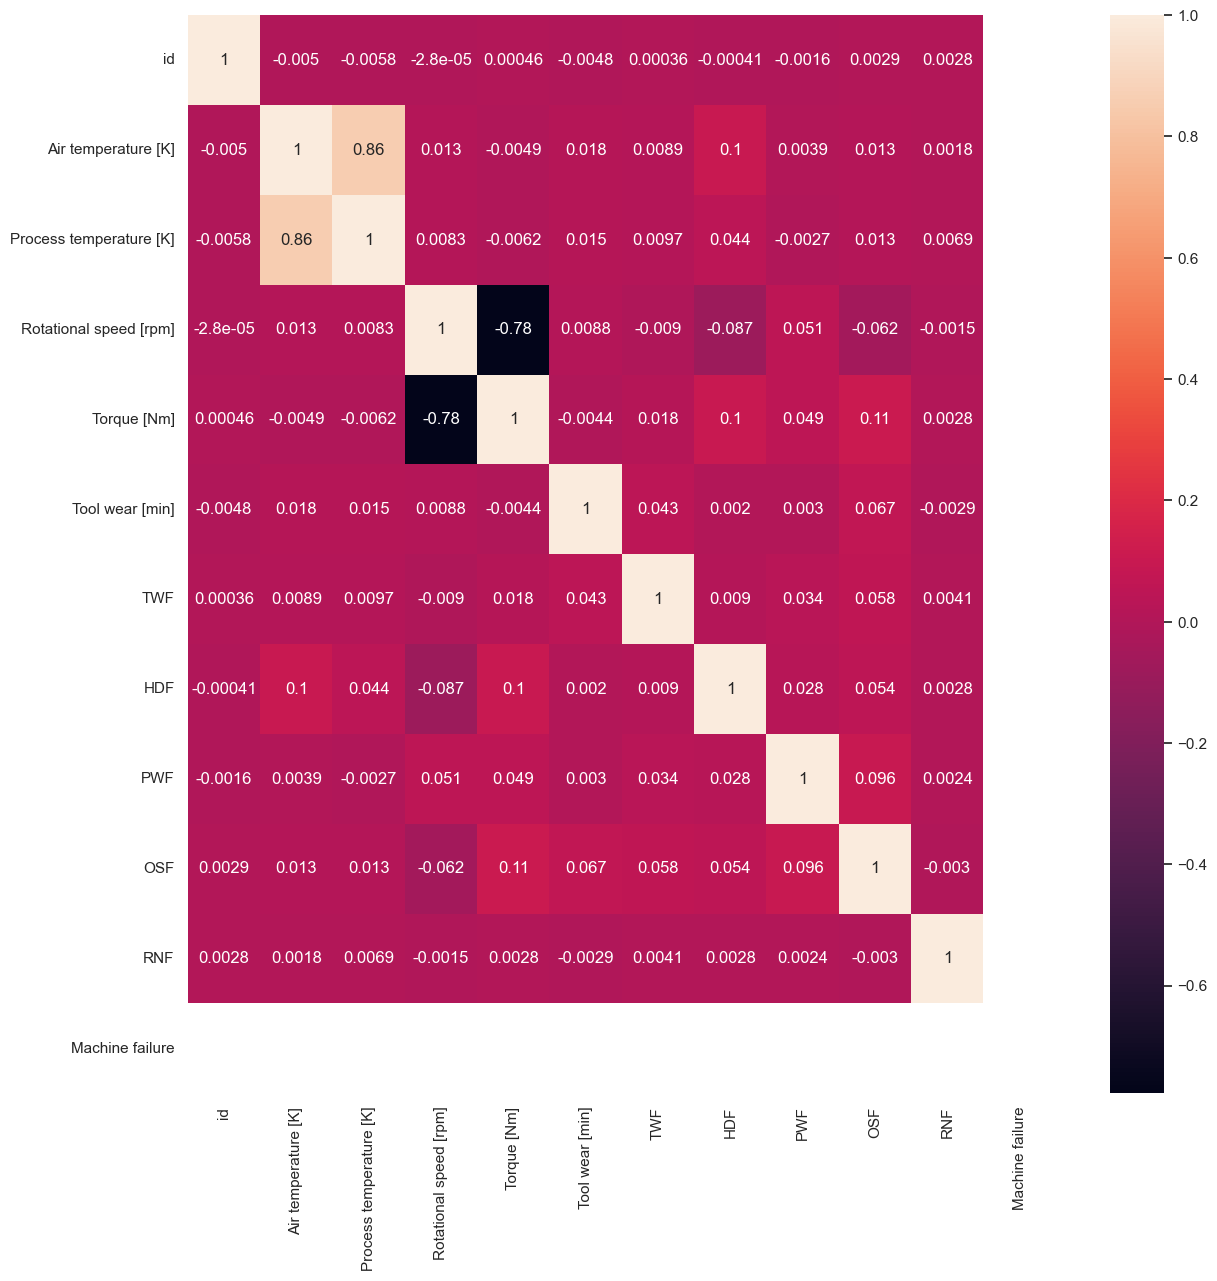

In [128]:
sns.heatmap(df_test.corr(numeric_only=True), annot=True)

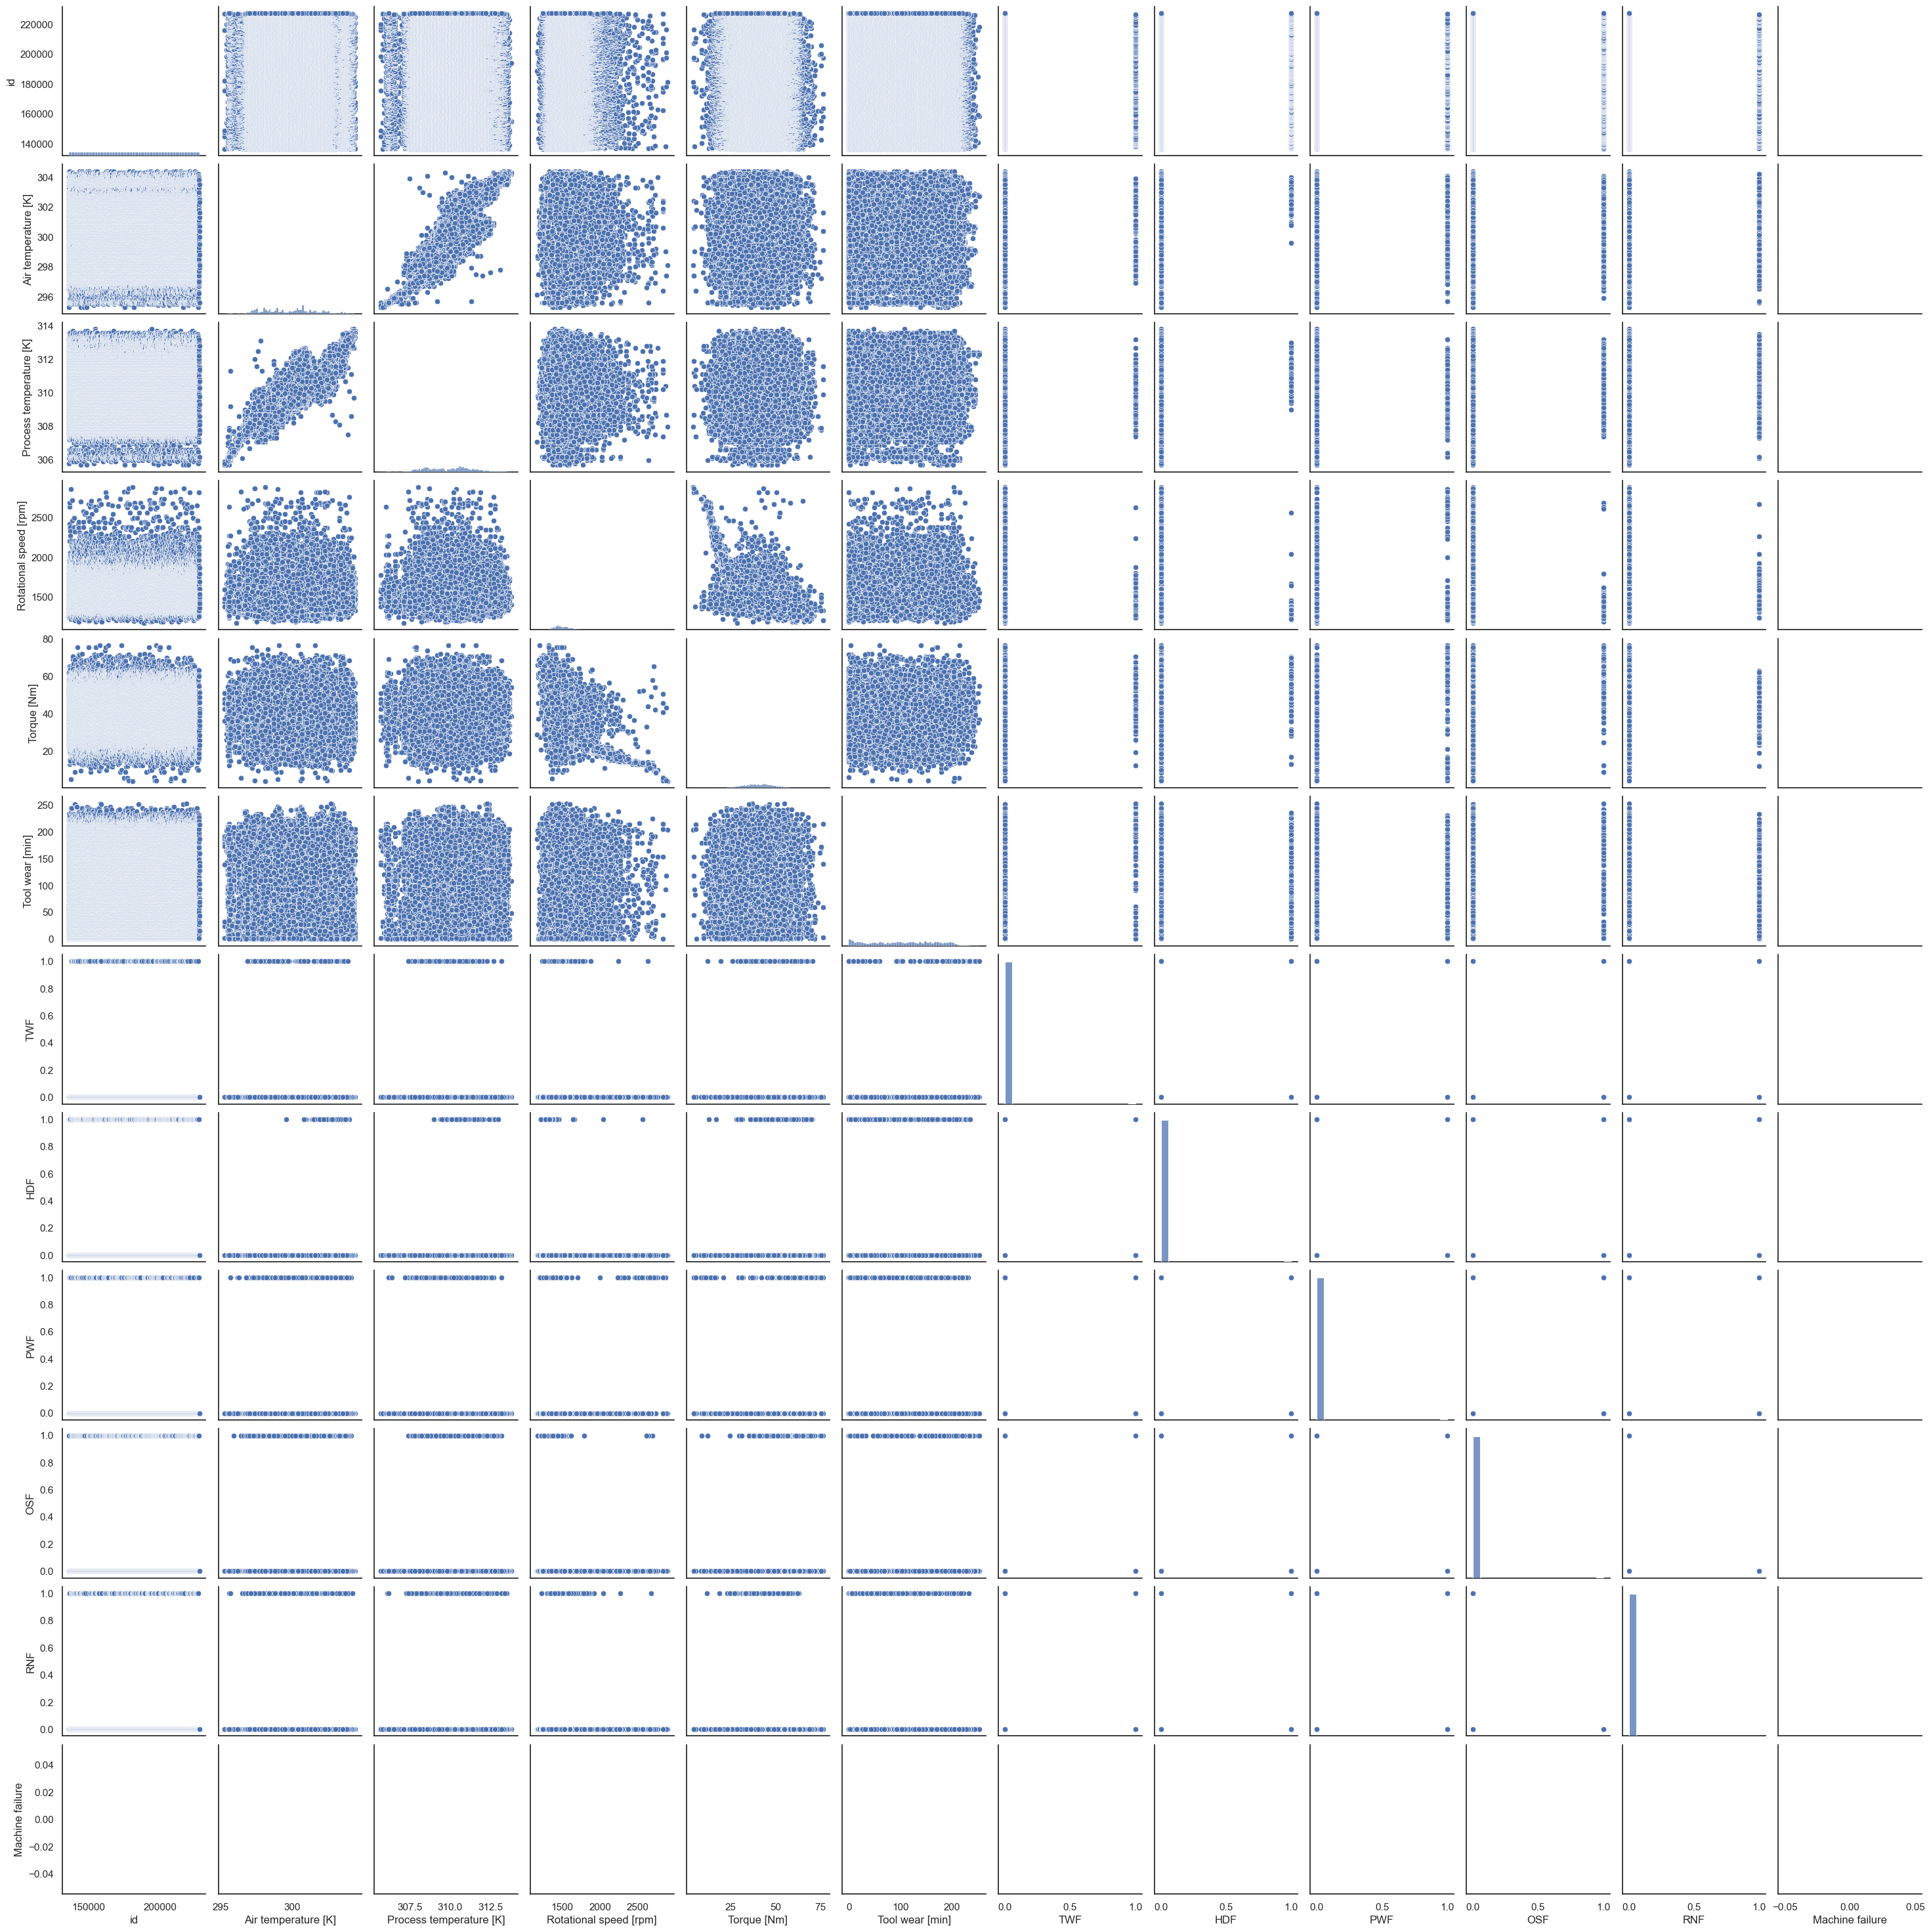

In [129]:
sns.pairplot(df_test)

Algunos plots para entender mejor la data:

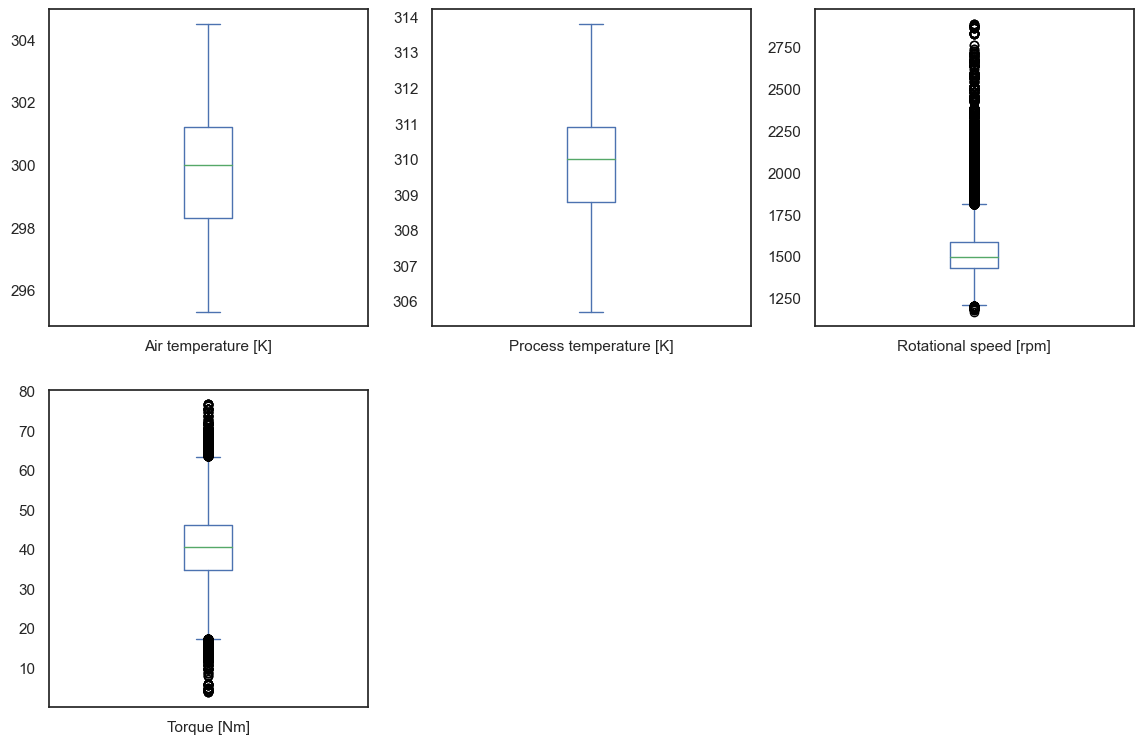

In [130]:
df_train.iloc[:,2:7].plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

Un diagrama de caja (o diagrama de caja y bigotes) muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica. El cuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto los puntos que se determinan como "valores atípicos" utilizando un método que es función del rango intercuartil.

## Features classification

In [131]:
features = train.columns.tolist()

# Categóricas
cat_features = ['Product ID', 'Type']

# Binarias
bin_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Numericas
num_features = [i for i in features if i not in (cat_features + bin_features)]
              
print(':' * 40)
print('Features categóricas:', len(cat_features)) 
print('Features binariaas:', len(bin_features))  
print('Features numéricas:', len(num_features)) 
print(':' * 40)
print('Totales:', len(features))
print(':' * 40)

::::::::::::::::::::::::::::::::::::::::
Features categóricas: 2
Features binariaas: 5
Features numéricas: 7
::::::::::::::::::::::::::::::::::::::::
Totales: 14
::::::::::::::::::::::::::::::::::::::::


## Estudio de features binarias

In [132]:
dfv = pd.DataFrame(data= {'Value': ['Number 0', 'Percent 0', '', 'Number 1', 'Percent 1']})

for f in bin_features: 
    n_f = train[f].value_counts()
    p_f = train[f].value_counts(normalize=True)
    dfv[f] = [n_f[0], p_f[0], '', n_f[1], p_f[1]]
    
dfv.set_index('Value')

,TWF,HDF,PWF,OSF,RNF
Value,,,,,
Number 0,136217,135725,136102,135889,136121
Percent 0,0.998446,0.99484,0.997603,0.996042,0.997742
,,,,,
Number 1,212,704,327,540,308
Percent 1,0.001554,0.00516,0.002397,0.003958,0.002258


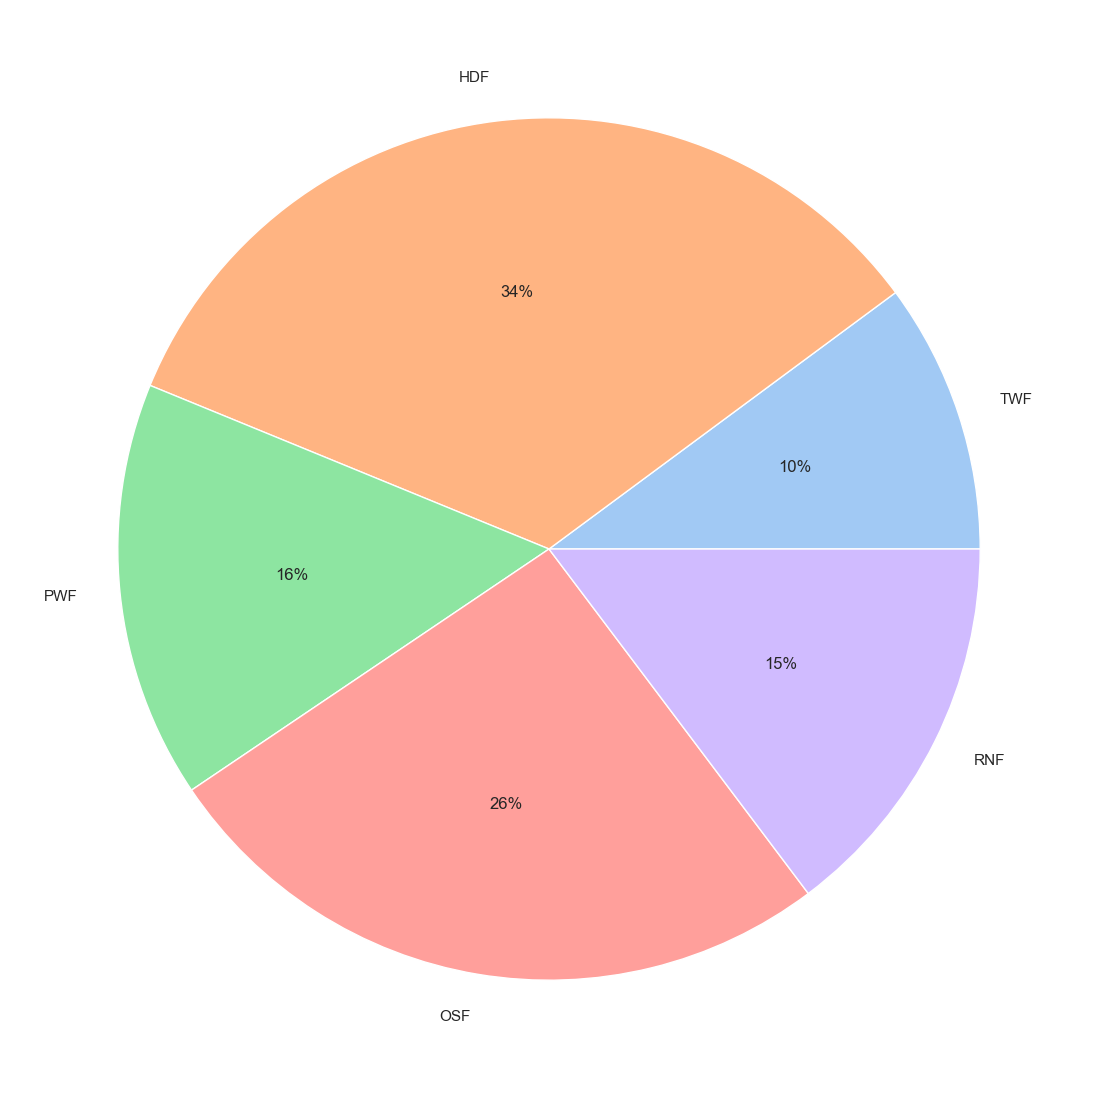

In [133]:
#definimos la data
data = [212, 704, 327, 540, 308]
labels = ['TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

#Definimos la paleta de color a usar
colors = sns.color_palette('pastel')[0:5]

#Creamos el pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Estudio de la features numéricas

In [134]:
num_features

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

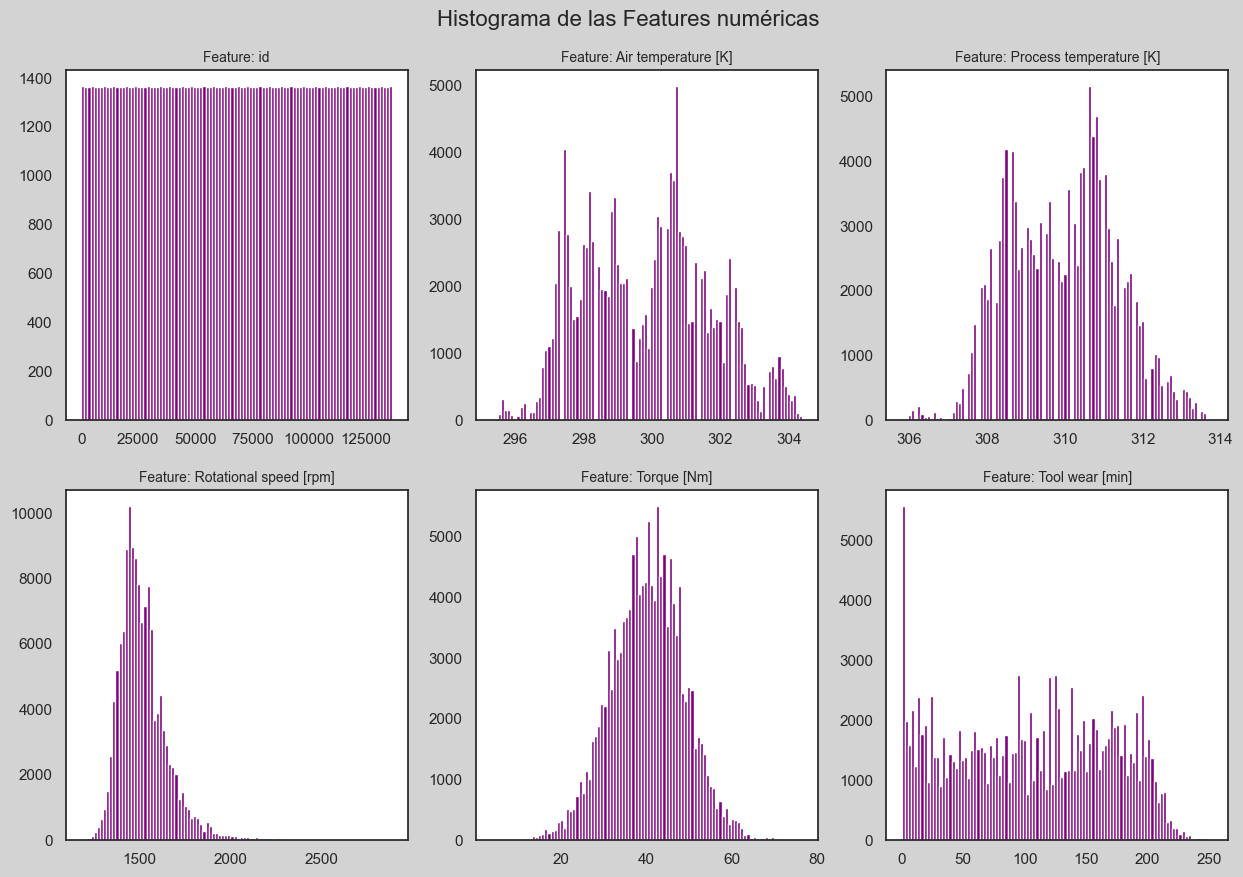

In [135]:
sns.set()
plt.style.use('seaborn-ticks') 
_, axs = plt.subplots(2, 3, figsize=(15,10), facecolor='lightgray')

for f, ax in zip(num_features, axs.ravel()):
    ax.set_facecolor('white')
    ax.hist(train[f], bins=100, color='purple')
    ax.set_title(f'Feature: {f}', fontsize=10)

plt.suptitle('Histograma de las Features numéricas', y=0.94, fontsize=16)
plt.show()

Escalado de las Numerical Features

In [136]:
num_features.pop()

'Machine failure'

In [137]:
num_features

['id',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

In [138]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador solo en los datos de entrenamiento y luego transformarlos
df_train[num_features] = scaler.fit_transform(df_train[num_features])

NameError: name 'StandardScaler' is not defined

In [ ]:
# Usar el mismo escalador ajustado en los datos de prueba para transformarlos
df_test[num_features] = scaler.transform(df_test[num_features])


## Feature importance

Modificamos algunos nombres de columnas con caracteres especiales para que no den problemas más adelante

In [ ]:
def clean_column_names(df):
    df.columns = df.columns.str.replace('[', '', regex=False)
    df.columns = df.columns.str.replace(']', '', regex=False)
    df.columns = df.columns.str.replace(' ', '_', regex=False)
    df.columns = df.columns.str.replace(':', '', regex=False)
    return df

df_train = clean_column_names(df_train)
df_test = clean_column_names(df_test)

df_train
df_test

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Machine_failure
id,,,,,,,,,,,,,
136429,L50896,L,1.296524,1.116587,-0.159146,-0.269888,-0.698218,0,0,0,0,0,NaN
136430,L53866,L,0.976067,0.757447,1.348428,-1.338318,-1.370622,0,0,0,0,0,NaN
136431,L50498,L,0.762429,0.326477,0.024017,-0.304728,-0.135275,0,0,0,0,0,NaN
136432,M21232,M,0.121515,-0.248148,-0.300041,0.844996,-1.558269,0,0,0,0,0,NaN
136433,M19751,M,1.884029,1.691213,-0.046430,0.113354,0.146196,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L51130,L,1.296524,1.044759,-0.264817,0.008833,-1.401896,0,0,0,0,0,NaN
227379,L47783,L,-1.053494,-0.104492,0.143778,-0.757650,-1.151700,0,0,0,0,0,NaN
227380,L48097,L,-2.281913,-2.690307,-0.145057,0.124967,1.287719,0,0,0,0,0,NaN


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crea un modelo de Random Forest
rf_model = RandomForestClassifier()

# Ajusta el modelo a tus datos
rf_model.fit(X, y)

# Obtén la importancia de características
feature_importance_rf = rf_model.feature_importances_

# Ahora puedes imprimir o analizar la importancia de características
print(feature_importance_rf)

[0.21882545 0.05634781 0.06051804 0.09787474 0.04696085 0.09208375
 0.42738936]


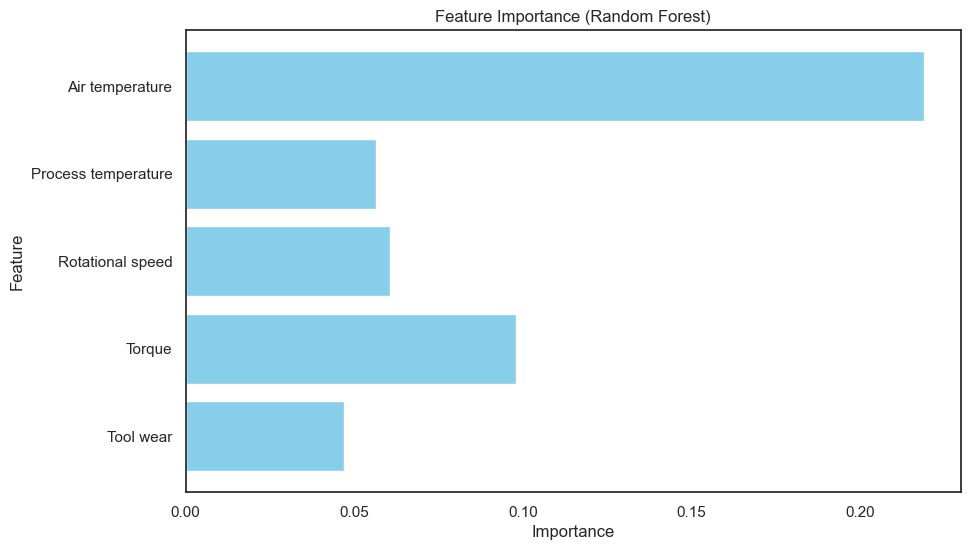

In [ ]:
# Nombres de características (reemplaza con tus propias etiquetas)
feature_labels = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

# Obtén la importancia de características del modelo
feature_importance_rf = rf_model.feature_importances_

# Solo considera los primeros 5 valores de importancia
feature_importance_rf = feature_importance_rf[:5]

# Crea un gráfico de barras de la importancia de características
plt.figure(figsize=(10, 6))
plt.barh(feature_labels[:5], feature_importance_rf, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes estén en la parte superior
plt.show()

Gradient Boosting

In [ ]:
import xgboost as xgb

# Crea un modelo de Gradient Boosting
xgb_model = xgb.XGBClassifier()

# Ajusta el modelo a tus datos
xgb_model.fit(X, y)

# Obtén la importancia de características
feature_importance_xgb = xgb_model.feature_importances_

# Ahora puedes imprimir o analizar la importancia de características
print(feature_importance_xgb)

[0.10795919 0.05927221 0.0709644  0.1195396  0.05422737 0.07925122
 0.5087861 ]


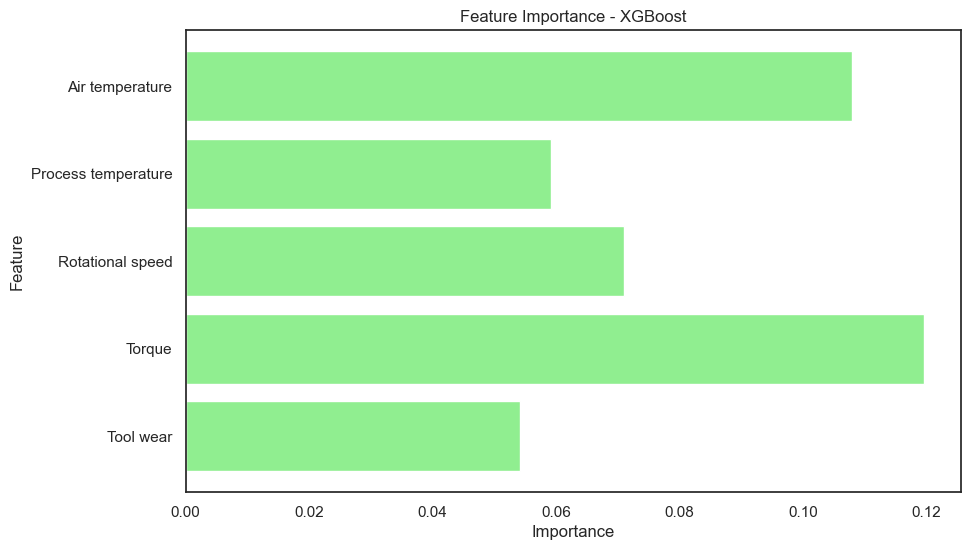

In [ ]:
# Nombres de características (reemplaza con tus propias etiquetas)
feature_labels = ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear']

# Obtén la importancia de características del modelo
feature_importance_xgb = xgb_model.feature_importances_

# Solo considera los primeros 5 valores de importancia
feature_importance_xgb = feature_importance_xgb[:5]

# Crea un gráfico de barras de la importancia de características
plt.figure(figsize=(10, 6))
plt.barh(feature_labels[:5], feature_importance_xgb, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes estén en la parte superior
plt.show()

# 5. Limpieza de datos
# Crear un duplicado del DataFrame original

In [ ]:
df_train_duplicado = df_train.copy()
df_train_duplicado

,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF
0,L50096,L,0.388563,-0.248148,0.524194,-0.490542,0.552766,0,0,0,0,0
1,M20343,M,1.456753,1.547557,1.672486,-1.303478,1.491004,0,0,0,0,0
2,L49454,L,-0.305761,-1.038258,1.996544,-1.605426,-1.245523,0,0,0,0,0
3,L53355,L,0.602201,0.685618,0.016972,0.461755,1.444092,0,0,0,0,0
4,M24050,M,-1.000084,-0.679117,0.841207,-0.571836,-1.104788,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M24855,M,-0.572808,-1.110086,0.580552,-1.257025,-1.417534,0,0,0,0,0
9997,H39410,H,-0.519399,-1.110086,0.777804,-0.989917,-1.370622,0,0,0,0,0
9998,M24857,M,-0.465989,-0.966430,0.869386,-0.804103,-1.292435,0,0,0,0,0
9999,H39412,H,-0.465989,-0.894602,-0.800217,0.949517,-1.245523,0,0,0,0,0


In [ ]:
# Eliminar la columna 'Product ID'
columna_a_eliminar = 'Product_ID'
df_train_duplicado = df_train.drop(columna_a_eliminar, axis=1)

print("\nDataFrame TRAIN duplicado:")
print(df_train_duplicado)


DataFrame TRAIN duplicado:
      Type  Air_temperature_K  Process_temperature_K  Rotational_speed_rpm  \
0        L           0.388563              -0.248148              0.524194   
1        M           1.456753               1.547557              1.672486   
2        L          -0.305761              -1.038258              1.996544   
3        L           0.602201               0.685618              0.016972   
4        M          -1.000084              -0.679117              0.841207   
...    ...                ...                    ...                   ...   
9996     M          -0.572808              -1.110086              0.580552   
9997     H          -0.519399              -1.110086              0.777804   
9998     M          -0.465989              -0.966430              0.869386   
9999     H          -0.465989              -0.894602             -0.800217   
10000    M          -0.465989              -0.894602             -0.152101   

       Torque_Nm  Tool_wear_min  TW

In [ ]:
#Eliminar Product ID de TEST
df_test = df_test.drop(['Product_ID'] , axis=1)

In [ ]:
df_test

,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Machine_failure
id,,,,,,,,,,,,
136429,L,1.296524,1.116587,-0.159146,-0.269888,-0.698218,0,0,0,0,0,NaN
136430,L,0.976067,0.757447,1.348428,-1.338318,-1.370622,0,0,0,0,0,NaN
136431,L,0.762429,0.326477,0.024017,-0.304728,-0.135275,0,0,0,0,0,NaN
136432,M,0.121515,-0.248148,-0.300041,0.844996,-1.558269,0,0,0,0,0,NaN
136433,M,1.884029,1.691213,-0.046430,0.113354,0.146196,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
227378,L,1.296524,1.044759,-0.264817,0.008833,-1.401896,0,0,0,0,0,NaN
227379,L,-1.053494,-0.104492,0.143778,-0.757650,-1.151700,0,0,0,0,0,NaN
227380,L,-2.281913,-2.690307,-0.145057,0.124967,1.287719,0,0,0,0,0,NaN


## Eliminamos los valores duplicados

In [ ]:
df_train_duplicado.drop_duplicates(inplace=True)
df_train.shape

(146429, 12)

In [ ]:
df_test.drop_duplicates(inplace=True)
df_test.shape

(90426, 12)

Como partiamos de: 
    Shape of the training data:  (136429, 13)
    Shape of the testing data:  (90954, 12)
Hemos limpiado:

In [ ]:
#Valores duplicados del TRAIN que han sido eliminados
136429-135295

1134

In [ ]:
#Valores duplicados del TEST que han sido eliminados
90954-90431

523

## Evaluation Metric (AUC)

Estudiamos el área bajo la curva.

En términos generales, la interpretación del AUC es la siguiente:

    AUC = 0.5: El modelo no tiene capacidad de discriminación y sus predicciones son equivalentes a lanzar una moneda.

    0.5 < AUC < 1: El modelo tiene cierta capacidad de discriminación. Cuanto más cerca de 1, mejor es la capacidad del modelo para distinguir entre clases.

    AUC = 1: El modelo tiene una capacidad perfecta de discriminación y puede distinguir perfectamente entre clases positivas y negativas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un modelo 
model = RandomForestClassifier()

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos las predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Obtenemos los valores reales (y_test) y predichos (y_pred)
true_list = y_test
pred_list = y_pred

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def roc_auc(true_list, pred_list, a, b):
    
    fpr, tpr, _ = roc_curve(true_list, pred_list)    
    roc_auc = auc(fpr, tpr)

    # print(f'FPR: {fpr}')
    # print(f'TPR: {tpr}')
    # print(f'{list(zip(fpr,tpr))}') 
    print(f'\n>>>>> ROC_AUC: %0.6f <<<<<\n' %roc_auc)
    
    sns.set()
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(a, b), facecolor='lightgray')
    plt.gca().set_facecolor('white')
    plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('The area under the ROC curve\n')
    plt.legend(loc="lower right")
    plt.show()


>>>>> ROC_AUC: 0.889300 <<<<<



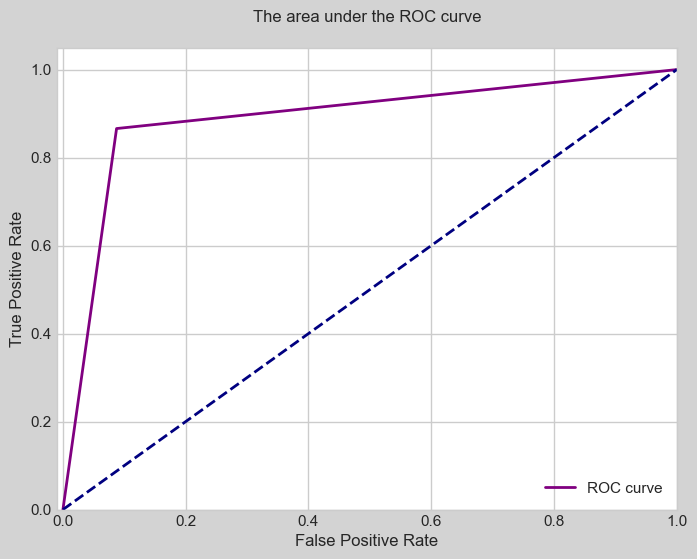

In [ ]:
# Llama a la función roc_auc para generar el gráfico
roc_auc(true_list, pred_list, a=8, b=6)

Esta métrica evalúa la capacidad discriminativa de un modelo de clasificación binaria. La curva ROC es una representación gráfica que muestra la relación entre la tasa de verdaderos positivos (TPR, True Positive Rate) y la tasa de falsos positivos (FPR, False Positive Rate) en diferentes umbrales de clasificación.

La escala del AUC va de 0.5 (clasificación aleatoria) a 1.0 (clasificación perfecta), por lo que un valor cercano a 0.9 indica que tu modelo tiene una buena capacidad para distinguir entre las clases positiva y negativa.

En conclusión podemos decir que hemos construido un buen modelo ya que queda muy cerca del 0.9

# Por último extraemos el csv actualizado:

In [139]:
df_train.to_csv('df_TRAIN.csv', index=False)  # Guarda el DataFrame en un archivo CSV
df_test.to_csv('df_TEST.csv', index=False) 
df_target.to_csv('df_TARGET.csv', index=False)